<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/YT_PandasAI_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PandasAI

Pandas AI is a Python library that adds generative artificial intelligence capabilities to Pandas, the popular data analysis and manipulation tool.

Here is a very simple demo about how it work!

First of all we install the dependencies:

In [ ]:
!pip -q install --upgrade pandas pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.7/797.7 kB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.3/113.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 

Now we import the dependencies:

In [ ]:
import pandas as pd
import pandasai as pdai
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from pandasai.llm.starcoder import Starcoder
from pandasai.llm.open_assistant import OpenAssistant
from pandasai.llm.google_palm import GooglePalm

We create a dataframe using pandas:

In [ ]:
df = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "gdp": [21400000, 2940000, 2830000, 3870000, 2160000, 1350000, 1780000, 1320000, 516000, 14000000],
    "happiness_index": [7.3, 7.2, 6.5, 7.0, 6.0, 6.3, 7.3, 7.3, 5.9, 5.0]
})

We instanciate the llm (in this case OpenAI). Remember to change the API key with you OpenAI api key.

In [ ]:
OPENAI_API_KEY = "" #insert your API Key
llm = OpenAI(api_token=OPENAI_API_KEY)

Then we instantiate PandasAI with the provided large language model and we run it, passing the dataframe and the prompt

In [ ]:
pandas_ai = PandasAI(llm)

In [ ]:
pandas_ai.run(df, prompt='Which are the 5 happiest countries?')

'According to the data, the top 5 happiest countries are the United States, Canada, Australia, United Kingdom, and Germany.'

You can also show a chart, for example:

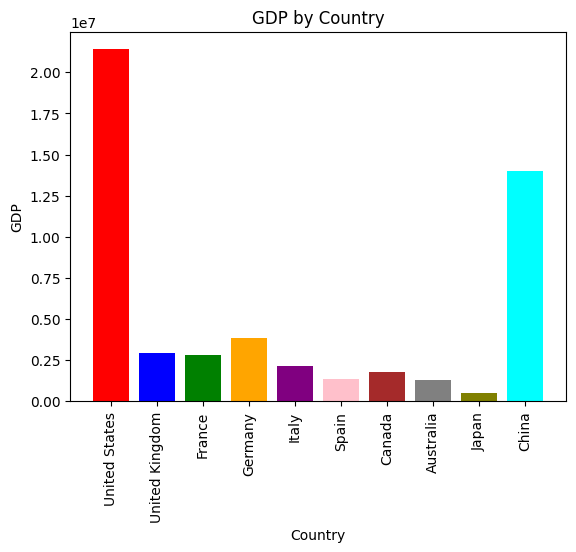

'Can you create a histogram that displays the GDP of different countries, with each bar being a different color?'

In [ ]:
pandas_ai.run(df, "Plot the histogram of countries showing for each the gpd, using different colors for each bar")

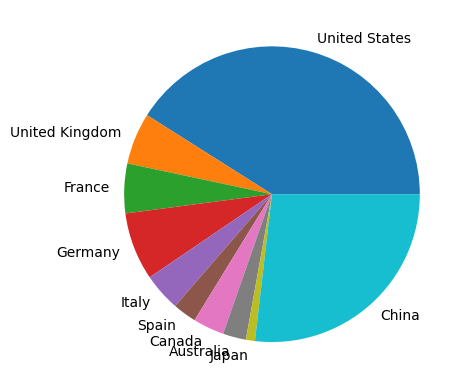

'Sure, I can help you with that! We can create a pie chart that displays the GDP of different countries. Would you like me to proceed with that?'

In [ ]:
pandas_ai.run(df, "Plot a pie chart of countries showing for each the gpd")

## with CSV

https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

In [ ]:
df = pd.read_csv("/content/titanic.csv")

In [ ]:
pandas_ai.run(df, prompt='How many people died?')

'According to the data provided, 549 people died.'

In [ ]:
pandas_ai.run(df, prompt='Show me the ratio of males to female that died?')

'Out of all the people who died, there were about 5.78 times more males than females.'

In [ ]:
pandas_ai.run(df, prompt='What ws the average age of those who survived?')

'On average, the survivors were around 28 years old.'

In [ ]:
average_age_survived = df[df['Survived'] == 1]['Age'].mean()
print(average_age_survived)

28.343689655172415


In [ ]:
pandas_ai.run(df, prompt='What is the pandas command to get the average age of those who died')

'The average age of those who died can be obtained using the pandas command and it is 30.63 years.'

In [ ]:
average_age_died = df[df['Survived'] == 0]['Age'].mean()
print(average_age_died)

30.62617924528302


In [ ]:
# trying to get output as DF

pandas_ai = PandasAI(llm, conversational=False)
new_df = pandas_ai.run(df, prompt='Please give me a dataframe of those whose ticket cost more than 50 pounds',is_conversational_answer=False)

print(new_df)

     PassengerId  Survived  Pclass   
1              2         1       1  \
3              4         1       1   
6              7         0       1   
27            28         0       1   
31            32         1       1   
..           ...       ...     ...   
856          857         1       1   
863          864         0       3   
867          868         0       1   
871          872         1       1   
879          880         1       1   

                                                  Name     Sex   Age  SibSp   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1  \
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
..                                                 ...     ...   ... 

In [ ]:
new_df.head()

AttributeError: ignored

## Show Code

In [ ]:
pandas_ai = PandasAI(llm, conversational=True, verbose=True)

In [ ]:
pandas_ai.run(df,
              prompt='What is the pandas command to get the average age of those who died',
              show_code=True,
              is_conversational_answer=True)

Running PandasAI with openai LLM...

Code generated:
```
df[df['Survived']==0]['Age'].mean()
```

Code running:
```
df[df['Survived'] == 0]['Age'].mean()
```
Answer: 30.62617924528302
Conversational answer: The average age of those who died can be obtained using the pandas command and it is 30.63 years.


'The average age of those who died can be obtained using the pandas command and it is 30.63 years.'

Running PandasAI with openai LLM...


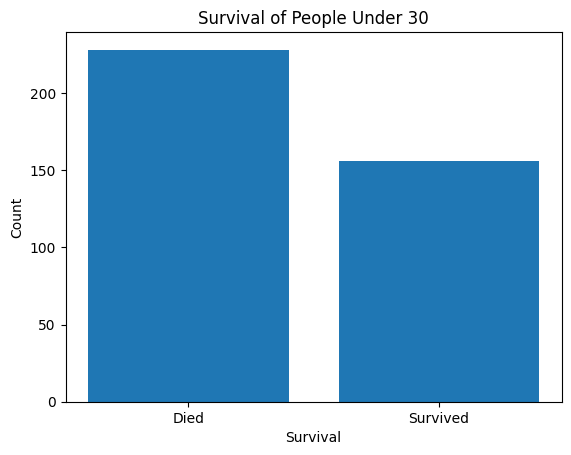


Code generated:
```
import matplotlib.pyplot as plt

# filter dataframe to include only people under 30
df_under_30 = df[df['Age'] < 30]

# group by Survived column and count values
survival_counts = df_under_30.groupby('Survived').size()

# create bar plot
plt.bar(['Died', 'Survived'], survival_counts)
plt.title('Survival of People Under 30')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()
```

Code running:
```
df_under_30 = df[df['Age'] < 30]
survival_counts = df_under_30.groupby('Survived').size()
plt.bar(['Died', 'Survived'], survival_counts)
plt.title('Survival of People Under 30')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()
```
Answer: 
Conversational answer: Sure, I can create a plot that shows the number of people who survived and died on the Titanic, specifically for those under 30 years old.


'Sure, I can create a plot that shows the number of people who survived and died on the Titanic, specifically for those under 30 years old.'

In [ ]:
pandas_ai.run(df, prompt='Make plot of died versus survived for peopl under 30',show_code=True)

Running PandasAI with openai LLM...


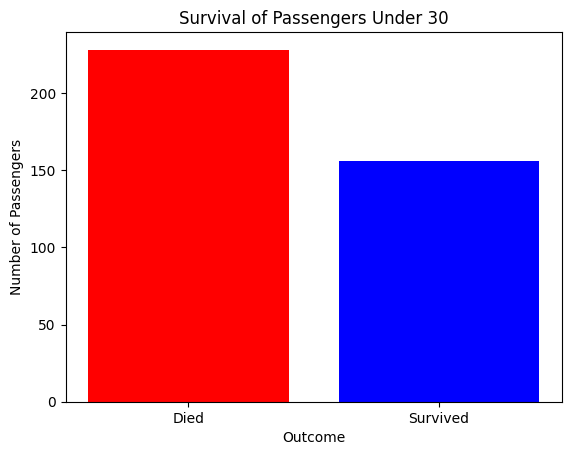


Code generated:
```
import matplotlib.pyplot as plt

# filter dataframe to include only passengers under 30 years old
df_under_30 = df[df['Age'] < 30]

# create a bar plot of survived vs died for passengers under 30
plt.bar(['Died', 'Survived'], df_under_30['Survived'].value_counts(), color=['red', 'blue'])
plt.title('Survival of Passengers Under 30')
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.show()
```

Code running:
```
df_under_30 = df[df['Age'] < 30]
plt.bar(['Died', 'Survived'], df_under_30['Survived'].value_counts(), color
    =['red', 'blue'])
plt.title('Survival of Passengers Under 30')
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.show()
```
Answer: 
Conversational answer: Sure, I can create a plot that shows the number of people who survived and died under the age of 30. We can use different colors to represent the two categories, such as blue for those who survived and red for those who didn't.


"Sure, I can create a plot that shows the number of people who survived and died under the age of 30. We can use different colors to represent the two categories, such as blue for those who survived and red for those who didn't."

In [ ]:
pandas_ai.run(df, prompt='Make plot of died versus survived for peopl under 30 (red vs blue)',show_code=True)

In [ ]:
pandas_ai.run(df, prompt='How many people on the Titanic were called "Eugene" ',show_code=True)

Running PandasAI with openai LLM...

Code generated:
```
# First, we need to check if the "Name" column contains the name "Eugene"
df[df["Name"].str.contains("Eugene")]

# Then, we can count the number of rows in the resulting dataframe
num_eugenes = len(df[df["Name"].str.contains("Eugene")])

print(num_eugenes)
```

Code running:
```
df[df['Name'].str.contains('Eugene')]
num_eugenes = len(df[df['Name'].str.contains('Eugene')])
print(num_eugenes)
```
Answer: 3

Conversational answer: There were only three people on the Titanic who went by the name "Eugene."


'There were only three people on the Titanic who went by the name "Eugene."'

In [ ]:
## currently no memory
pandas_ai.run(df, prompt='Show me their names',show_code=True)

Running PandasAI with openai LLM...

Code generated:
```
df['Name']
```

Code running:
```
df['Name']
```
Answer: 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
Conversational answer: Sure, here are the names of the passengers: 
- Braund, Mr. Owen Harris
- Cumings, Mrs. John Bradley (Florence Briggs Th...)
- Heikkinen, Miss. Laina
- Futrelle, Mrs. Jacques Heath (Lily May Peel)
-

'Sure, here are the names of the passengers: \n- Braund, Mr. Owen Harris\n- Cumings, Mrs. John Bradley (Florence Briggs Th...)\n- Heikkinen, Miss. Laina\n- Futrelle, Mrs. Jacques Heath (Lily May Peel)\n- Allen, Mr. William Henry\n- and so on...'

In [ ]:
pandas_ai.run(df, prompt='Show me the full names of peopled "Eugene" on the titanic ',show_code=True)

Running PandasAI with openai LLM...

Code generated:
```
# First, we need to filter the dataframe to only include rows where the Name column contains "Eugene"
eugene_df = df[df['Name'].str.contains('Eugene')]

# Then, we can extract the full names from the Name column
full_names = eugene_df['Name'].tolist()

# Finally, we can print out the full names
for name in full_names:
    print(name)
```

Code running:
```
eugene_df = df[df['Name'].str.contains('Eugene')]
full_names = eugene_df['Name'].tolist()
for name in full_names:
    print(name)
```
Answer: Rice, Master. Eugene
Williams, Mr. Charles Eugene
Daly, Mr. Eugene Patrick

Conversational answer: Sure! There were three people named Eugene on the Titanic. Their full names were Master Eugene Rice, Mr. Charles Eugene Williams, and Mr. Eugene Patrick Daly.


'Sure! There were three people named Eugene on the Titanic. Their full names were Master Eugene Rice, Mr. Charles Eugene Williams, and Mr. Eugene Patrick Daly.'

In [ ]:
# trying to get output as DF

new_df = pandas_ai.run(df, prompt='Please give me a dataframe of those whose ticket cost more than 50 pounds',
                       is_conversational_answer=False,
                       show_code=True)



Running PandasAI with openai LLM...

Code generated:
```
df_expensive_tickets = df[df['Fare'] > 50]
print(df_expensive_tickets)
```

Code running:
```
df_expensive_tickets = df[df['Fare'] > 50]
print(df_expensive_tickets)
```
Answer:      PassengerId  Survived  Pclass   
1              2         1       1  \
3              4         1       1   
6              7         0       1   
27            28         0       1   
31            32         1       1   
..           ...       ...     ...   
856          857         1       1   
863          864         0       3   
867          868         0       1   
871          872         1       1   
879          880         1       1   

                                                  Name     Sex   Age  SibSp   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1  \
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0    

In [ ]:
new_df = df_expensive_tickets = df[df['Fare'] > 50]
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C


## Privacy Enforced

In order to generate the Python code to run, we take the dataframe head, we randomize it (using random generation for sensitive data and shuffling for non-sensitive data) and send just the head.



In [ ]:
pdai.helpers.anonymizer.anonymize_dataframe_head(df,force_conversion=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4,0,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",male,35.0,0,0,PC 17599,8.050,nan,S
1,3,1,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,26.0,0,0,113803,7.925,nan,S
2,5,1,1,"Heikkinen, Miss. Laina",female,35.0,0,0,A/5 21171,53.100,nan,S
3,4,1,1,"Allen, Mr. William Henry",male,35.0,1,0,STON/O2. 3101282,7.250,C123,S
4,5,1,1,"Braund, Mr. Owen Harris",female,26.0,1,0,373450,8.050,C85,C


Also, if you want to enforce further your privacy you can instantiate PandasAI with enforce_privacy = True which will not send the head (but just column names) to the LLM

In [ ]:
pandas_ai = PandasAI(llm, verbose=True, conversational=False, enforce_privacy=True)

In [ ]:
pandas_ai.run(df, prompt='How many females over 55 survived?',anonymize_df=True )

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# read the csv file into a pandas dataframe
df = pd.read_csv('filename.csv')

# filter the dataframe to include only females over 55 who survived
female_over_55_survived = df[(df['Sex'] == 'female') & (df['Age'] > 55) & (df['Survived'] == 1)]

# count the number of rows in the filtered dataframe
count = len(female_over_55_survived)

print(count)
```

Code running:
```
female_over_55_survived = df[(df['Sex'] == 'female') & (df['Age'] > 55) & (
    df['Survived'] == 1)]
count = len(female_over_55_survived)
print(count)
```
Answer: 8



'8\n'

In [ ]:
pandas_ai.run(df, prompt='Show the names of the females over 55 who survived',show_code=True)

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd

# read the csv file into a pandas dataframe
df = pd.read_csv('filename.csv')

# filter the dataframe to include only females over 55 who survived
result = df[(df['Sex'] == 'female') & (df['Age'] > 55) & (df['Survived'] == 1)]['Name']

# print the names of the females over 55 who survived
print(result)
```

Code running:
```
result = df[(df['Sex'] == 'female') & (df['Age'] > 55) & (df['Survived'] == 1)
    ]['Name']
print(result)
```
Answer: 11                             Bonnell, Miss. Elizabeth
195                                Lurette, Miss. Elise
268       Graham, Mrs. William Thompson (Edith Junkins)
275                   Andrews, Miss. Kornelia Theodosia
366    Warren, Mrs. Frank Manley (Anna Sophia Atkinson)
483                              Turkula, Mrs. (Hedwig)
829           Stone, Mrs. George Nelson (Martha Evelyn)
879       Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
Name: Name, dtype: object



'11                             Bonnell, Miss. Elizabeth\n195                                Lurette, Miss. Elise\n268       Graham, Mrs. William Thompson (Edith Junkins)\n275                   Andrews, Miss. Kornelia Theodosia\n366    Warren, Mrs. Frank Manley (Anna Sophia Atkinson)\n483                              Turkula, Mrs. (Hedwig)\n829           Stone, Mrs. George Nelson (Martha Evelyn)\n879       Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)\nName: Name, dtype: object\n'

## Using Starcoder

In [ ]:
# Starcoder
starcoder_llm = Starcoder(api_token="") #API key goes here

In [ ]:
pandas_ai = PandasAI(starcoder_llm)
pandas_ai.run(df, prompt='How many males over 55 survived?')

'Unfortunately, I was not able to answer your question. Please try again. If the problem persists, try rephrasing your question.'

In [ ]:
pandas_ai.run(df, prompt='What is the average age?')

'Unfortunately, I was not able to answer your question. Please try again. If the problem persists, try rephrasing your question.'

## Using PaLM

In [ ]:
# PaLM
palm_llm = Starcoder(api_token="") #API key goes here

In [ ]:
pandas_ai = PandasAI(palm_llm)
pandas_ai.run(df, prompt='How many people died on the titanic?')

'Unfortunately, I was not able to answer your question. Please try again. If the problem persists, try rephrasing your question.'